# Neural Networks using NumPy
*Jacob Nelson and Yen Lee Loh, 2021-5-31; 2022-12-30*

This Jupyter Lab notebook demonstrates how to use pure NumPy to build and train simple neural networks.

---
## 1. Single-Layer Perceptron succeeds in learning 2-bit OR function

Consider a single-layer perceptron described by the feedforward equations
$u_1 = x_0 w_{01}, x_1 = \tanh u_1, F=(x_1-y)^2$:

    x0  ----------------> u1 ----------------> x1 ----------------> F
    w01 ---------------/                       y  --------------/

Here x0 is the input, w01 are the weights, u1 is a hidden node, x1 is the model output, y is the training output, and F is the loss.  We may calculate the gradient of F with respect to every node using backpropagation:

    dF/dx0  <-------- dF/du1 <------------- dF/dx1 <-------------- dF/dF=1
    dF/dw01 <--------/                      dF/dy  <--------------/

This allows us to calculate the gradient of $F$ with respect to the learnable parameters (weights), which allow us to train the network by adjusting the weights.

In [2]:
import numpy as np
np.set_printoptions (precision=4)
rng = np.random.default_rng(12345)
def mystr(a): return np.array2string(a.flatten().round(1), formatter={'float_kind': '{:+.1f}'.format})
def bitstring(xnd): return ''.join( [     ''.join([str(x) for x in xd] + [' '])    for xd in xnd] )
def sech2(x): return np.cosh(x)**(-2)

In [3]:
xnd = np.array( [[0,0,1],[0,1,1],[1,0,1],[1,1,1]] ) # training inputs (4x3)
ynd = np.array( [[-1],   [1],    [1],    [1]    ] ) # training outputs (4x1)

#======== Set up NN
N,D0 = xnd.shape
N,D1 = ynd.shape
w01 = rng.normal(size=(D0,D1))  # random weights
tau = 0.01                      # learning rate
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Training inputs xnd', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', '', bitstring(xnd), ''))
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', 'Initial weights W', 'Training outputs Y', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', mystr(w01), mystr(ynd), ''))
print ()
print ('{:10}{:20}{:30}{:10}'.format ('Epoch', 'Weights W', 'Model outputs x1', 'Loss F'))
#======== Loop over training epochs
for t in range(10001):
  #======== Load a batch of training data (in this case we just work with the entire dataset)
  x0 = xnd                    # N*D0
  y = ynd                     # N*D1
  #======== Feedforward
  u1 = x0 @ w01               # N*D1 = N*D0 dot D0*D1
  x1 = np.tanh (u1)           # N*D1
  F = np.sum((x1-y)**2)       # scalar = N*D1 doubledot N*D1
  #======== Backpropagate
  dFdx1  = 2*(x1-y)           # N*D1
  dFdu1  = sech2(u1) * dFdx1  # N*D1
  dFdx0  = dFdu1 @ w01.T      # N*D0 = N*D1 dot D1*D0 (actually we didn't need to compute this)
  dFdw01 = x0.T @ dFdu1       # D0*D1 = D0*N dot N*D1
  #======== Train
  w01 -= tau * dFdw01
  if t%1000==0:
    print ('{:<10d}{:20s}{:30s}{:.4f}'.format( t, str(w01.flatten().round(1)), mystr(x1), F ))

#======== Evaluate model decision function and training accuracy (goodness-of-fit)
Ymp = np.round(x1)            # Most Probable value of output
Ncorrect = np.sum(Ymp==y)
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Model prediction Ymp', 'Accuracy'))
print ('{:10}{:20}{:30}{}/{}={:.0f}%'.format ('', '', mystr(Ymp), Ncorrect, N, 100*Ncorrect/N))

                              Training inputs xnd                     
                              001 011 101 111                         

          Initial weights W   Training outputs Y                      
          [-1.4 +1.3 -0.9]    [-1  1  1  1]                           

Epoch     Weights W           Model outputs x1              Loss F    
0         [-1.4  1.3 -0.8]    [-0.7 +0.4 -1.0 -0.8]         7.5486
1000      [ 2.4  2.5 -1.1]    [-0.8 +0.9 +0.9 +1.0]         0.0695
2000      [ 2.9  2.9 -1.3]    [-0.9 +0.9 +0.9 +1.0]         0.0335
3000      [ 3.1  3.1 -1.4]    [-0.9 +0.9 +0.9 +1.0]         0.0218
4000      [ 3.2  3.2 -1.5]    [-0.9 +0.9 +0.9 +1.0]         0.0161
5000      [ 3.4  3.4 -1.6]    [-0.9 +0.9 +0.9 +1.0]         0.0127
6000      [ 3.5  3.5 -1.6]    [-0.9 +1.0 +1.0 +1.0]         0.0105
7000      [ 3.5  3.5 -1.7]    [-0.9 +1.0 +1.0 +1.0]         0.0089
8000      [ 3.6  3.6 -1.7]    [-0.9 +1.0 +1.0 +1.0]         0.0078
9000      [ 3.7  3.7 -1.7]    [-0.9 +1.0

---
## 2. Single-Layer Perceptron fails in learning 2-bit XOR function

In [4]:
xnd = np.array( [[0,0,1],[0,1,1],[1,0,1],[1,1,1]] ) # training inputs (4x3)
ynd = np.array( [[-1],   [1],    [1],    [-1]    ] ) # training outputs (4x1)

#======== Set up NN
N,D0 = xnd.shape
N,D1 = ynd.shape
w01 = rng.normal(size=(D0,D1))  # random weights
tau = 0.01                      # learning rate
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Training inputs xnd', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', '', bitstring(xnd), ''))
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', 'Initial weights W', 'Training outputs Y', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', mystr(w01), mystr(ynd), ''))
print ()
print ('{:10}{:20}{:30}{:10}'.format ('Epoch', 'Weights W', 'Model outputs x1', 'Loss F'))
#======== Loop over training epochs
for t in range(10001):
  #======== Load a batch of training data (in this case we just work with the entire dataset)
  x0 = xnd                    # N*D0
  y = ynd                     # N*D1
  #======== Feedforward
  u1 = x0 @ w01               # N*D1 = N*D0 dot D0*D1
  x1 = np.tanh (u1)           # N*D1
  F = np.sum((x1-y)**2)       # scalar = N*D1 doubledot N*D1
  #======== Backpropagate
  dFdx1  = 2*(x1-y)           # N*D1
  dFdu1  = sech2(u1) * dFdx1  # N*D1
  dFdx0  = dFdu1 @ w01.T      # N*D0 = N*D1 dot D1*D0 (actually we didn't need to compute this)
  dFdw01 = x0.T @ dFdu1       # D0*D1 = D0*N dot N*D1
  #======== Train
  w01 -= tau * dFdw01
  if t%1000==0:
    print ('{:<10d}{:20s}{:30s}{:.4f}'.format( t, str(w01.flatten().round(1)), mystr(x1), F ))

#======== Evaluate model decision function and training accuracy (goodness-of-fit)
Ymp = np.round(x1)            # Most Probable value of output
Ncorrect = np.sum(Ymp==y)
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Model prediction Ymp', 'Accuracy'))
print ('{:10}{:20}{:30}{}/{}={:.0f}%'.format ('', '', mystr(Ymp), Ncorrect, N, 100*Ncorrect/N))

                              Training inputs xnd                     
                              001 011 101 111                         

          Initial weights W   Training outputs Y                      
          [-0.3 -0.1 -0.7]    [-1  1  1 -1]                           

Epoch     Weights W           Model outputs x1              Loss F    
0         [-0.2 -0.1 -0.7]    [-0.6 -0.7 -0.8 -0.8]         6.0829
1000      [ 0.  0. -0.]       [-0.0 -0.0 -0.0 +0.0]         4.0000
2000      [ 0.  0. -0.]       [-0.0 -0.0 -0.0 +0.0]         4.0000
3000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
4000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
5000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
6000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
7000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
8000      [ 0.  0. -0.]       [-0.0 +0.0 +0.0 +0.0]         4.0000
9000      [ 0.  0. -0.]       [-0.0 +0.0

---
## 3. Two-Layer Perceptron is able to learn 2-bit XOR function

In [6]:
xnd = np.array( [[0,0,1],[0,1,1],[1,0,1],[1,1,1]] ) # training inputs (4x3)
ynd = np.array( [[-1],   [1],    [1],    [-1]    ] ) # training outputs (4x1)

#======== Set up NN
N,D0 = xnd.shape
N,D2 = ynd.shape
D1 = 4                          # number of intermediate nodes

w01 = rng.normal(size=(D0,D1)) # first layer weights
w12 = rng.normal(size=(D1,D2))    # second layer weights
tau = 0.01                      # learning rate
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Training inputs xnd', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', '', bitstring(xnd), ''))
print ()

#======== Loop over training epochs
for t in range(10001):
  #======== Load a batch of training data (in this case we just work with the entire dataset)
  x0 = xnd                    # N*D0
  y = ynd                     # N*D1
  #======== Feedforward

  # x0------->u1------>x1------>u2----->x2------>F
  # w01----->         w12----->

  u1 = x0 @ w01               # N*D1 = N*D0 dot D0*D1
  x1 = np.tanh (u1)           # N*D1
  u2 = x1 @ w12               # N*D2 = N*D1 dot D1*D2
  x2 = np.tanh (u2)           # N*D2
  F = np.sum((x2-y)**2)       # scalar = N*D1 doubledot N*D1
  #======== Backpropagate
  
  #                   dF/dx1 <------dF/du2 <-------dF/dx2 <------1
  
  dFdx2  = 2*(x2-y)           # N*D2
  dFdu2  = sech2(u2) * dFdx2  # N*D2
  dFdx1  = dFdu2 @ w12.T      # N*D1 = N*D2 dot D2*D1
  dFdw12 = x1.T @ dFdu2       # D1*D2 = D1*N dot N*D2
  dFdu1  = sech2(u1) * dFdx1  # N*D1
  dFdx0  = dFdu1 @ w01.T      # N*D0 = N*D1 dot D1*D0 (actually we didn't need to compute this)
  dFdw01 = x0.T @ dFdu1       # D0*D1 = D0*N dot N*D1
  #======== Train  
  w01 -= tau * dFdw01
  w12 -= tau * dFdw12
  if t==0: 
    print ('{:10}{:20}{:30}{:10}'.format ('Epoch', '', 'Model outputs x2', 'Loss F'))
  if t%1000==0:
    print ('{:<10d}{:20s}{:30s}{:.4f}'.format( t, '', mystr(x2), F ))

#======== Evaluate model decision function and training accuracy (goodness-of-fit)
Ymp = np.round(x2)            # Most Probable value of output
Ncorrect = np.sum(Ymp==y)
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Model prediction Ymp', 'Accuracy'))
print ('{:10}{:20}{:30}{}/{}={:.0f}%'.format ('', '', mystr(Ymp), Ncorrect, N, 100*Ncorrect/N))

                              Training inputs xnd                     
                              001 011 101 111                         

Epoch                         Model outputs x2              Loss F    
0                             [-0.5 +0.7 -1.0 -0.8]         4.1648
1000                          [-0.9 +0.9 +0.9 -0.9]         0.0553
2000                          [-0.9 +1.0 +0.9 -0.9]         0.0182
3000                          [-0.9 +1.0 +0.9 -0.9]         0.0105
4000                          [-1.0 +1.0 +1.0 -1.0]         0.0072
5000                          [-1.0 +1.0 +1.0 -1.0]         0.0055
6000                          [-1.0 +1.0 +1.0 -1.0]         0.0044
7000                          [-1.0 +1.0 +1.0 -1.0]         0.0036
8000                          [-1.0 +1.0 +1.0 -1.0]         0.0031
9000                          [-1.0 +1.0 +1.0 -1.0]         0.0027
10000                         [-1.0 +1.0 +1.0 -1.0]         0.0024

                              Model prediction Y

---
## 4. Visualize the operation of the 2-layer perceptron that produces the XOR function

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
plt.rcParams.update ({'font.family':'sans', 'font.size':14})

In [32]:
def node (ax, xy, radius, label, color, labelcolor='k'):
  ax.add_patch(Circle(xy, radius, edgecolor='k', linestyle='-', linewidth=1, facecolor=color))
  ax.text(*xy, label, color=labelcolor, ha='center', va='center')
def line (ax, xy0, xy1, **kwargs):
  ax.plot ([xy0[0],xy1[0]], [xy0[1],xy1[1]], **kwargs)
def arrow (ax, xy0, xy1, **kwargs):
  ax.quiver (*xy0, xy1[0]-xy0[0], xy1[1]-xy0[1], angles='xy',scale_units='xy',scale=1, **kwargs)
def drawElementwiseLayer (ax, xStart=0, xEnd=4, numInputs=3):
  I = numInputs
  l = xEnd - xStart
  r = .3
  for i in range(I):
    line (ax, (xStart,-i), (xEnd,-i), color='k', linewidth=.5, zorder=-999)
    arrow (ax, ((xStart+xEnd)/2-.2,-i), ((xStart+xEnd)/2+.2,-i),units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  ax.text ((xStart+xEnd)/2, 1, 'Elementwise', ha='center')
  
def drawLinearLayer (ax, inputs, outputs, weights, xStart=0, xEnd=4):
  xi = inputs
  yj = outputs
  wij = weights
  I,J = wij.shape
  l = xEnd - xStart
  r = .34
  #cmap = mpl.colormaps['RdBu']
  def cmap(x):
    if x>.5: u=x-.5; return [1-u,1-u,1]
    else:    u=.5-x; return [1,1-u,1-u]
  def posij (i,j):
    return xStart+(l-i+j)/2,(-l-i-j)/2
  for i in range(I):
    w = .5 + .5 *np.tanh(xi[i])
    node (ax, (xStart,-i), radius=r, label='{:.1f}'.format(xi[i]), color=cmap(w), labelcolor='k')
    line (ax, (xStart,-i), posij(i,J-1), color='k', linewidth=.5, zorder=-999)
    arrow (ax, posij(i,-1.5), posij(i,-1.), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  for j in range(J):
    w = .5 + .5 *np.tanh(yj[j])
    node (ax, (xEnd,-j), radius=r, label='{:.1f}'.format(yj[j]), color=cmap(w), labelcolor='k')
    line (ax, (xEnd,-j), posij(I-1,j), color='k', linewidth=.5, zorder=-999)
    arrow (ax, posij(-1.0,j), posij(-1.5,j), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  for i in range(I):
    for j in range(J):
      w = .5 + .5 *np.tanh(wij[i,j])
      node (ax, posij(i,j), radius=r, label='{:.1f}'.format(wij[i,j]), color=cmap(w), labelcolor='k')
  ax.text ((xStart+xEnd)/2, 1, 'Linear ({}x{})'.format(I,J), ha='center')

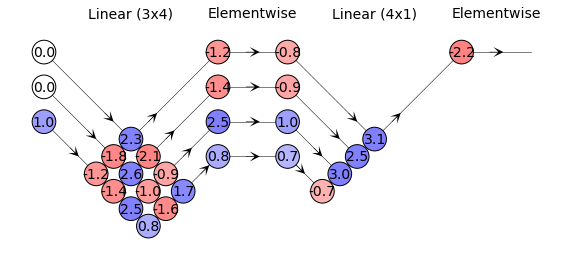

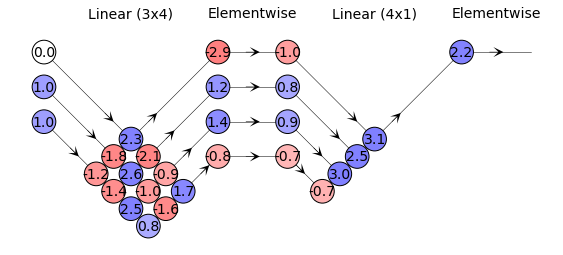

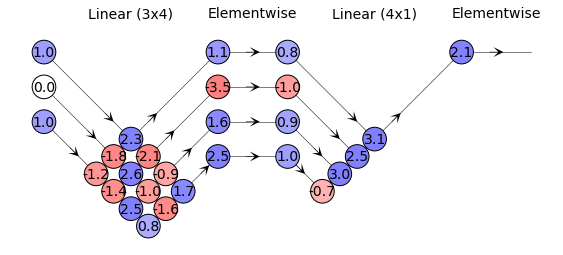

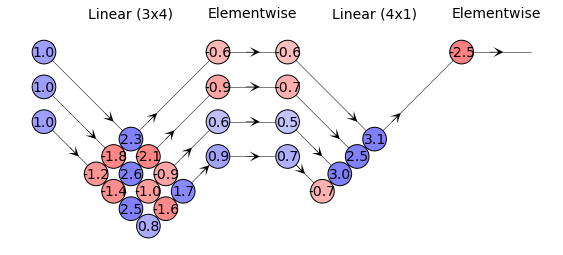

In [35]:
for n in range(4):
  fig,ax = plt.subplots();
  drawLinearLayer      (ax, xnd[n], u1[n], w01, 0,5)
  drawElementwiseLayer (ax, 5,7,   D1)
  drawLinearLayer      (ax, x1[n], u2[n], w12, 7,12)
  drawElementwiseLayer (ax, 12,14, D2)
  ax.set_xlim(); ax.set_ylim();
  ax.set_aspect('equal'); ax.axis ('off'); fig.set_size_inches (24,4)

---
## 5. Two-Layer Perceptron with Biases

In [36]:
xnd = np.array( [[0,0],[0,1],[1,0],[1,1]] ) # training inputs (4x3)
ynd = np.array( [[-1], [1],  [1],  [-1] ] ) # training outputs (4x1)

#======== Set up NN
N,D0 = xnd.shape
N,D2 = ynd.shape
D1 = 2                          # number of intermediate nodes

w01 = rng.normal(size=(D0,D1)) ; b1 = rng.normal(size=D1) # first layer params
w12 = rng.normal(size=(D1,D2)) ; b2 = rng.normal(size=D2) # second layer params
tau = 0.01                      # learning rate
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Training inputs xnd', ''))
print ('{:10}{:20}{:30}{:10}'.format ('', '', bitstring(xnd), ''))
print ()

#======== Loop over training epochs
for t in range(10001):
  #======== Load a batch of training data (in this case we just work with the entire dataset)
  x0 = xnd                    # N*D0
  y = ynd                     # N*D1
  #======== Feedforward
  u1 = x0 @ w01 + b1          # N*D1 = N*D0 dot D0*D1
  x1 = np.tanh (u1)           # N*D1
  u2 = x1 @ w12 + b2          # N*D2 = N*D1 dot D1*D2
  x2 = np.tanh (u2)           # N*D2
  F = np.sum((x2-y)**2)       # scalar = N*D1 doubledot N*D1
  #======== Backpropagate
  dFdx2  = 2*(x2-y)           # N*D2
  
  dFdu2  = sech2(u2) * dFdx2  # N*D2
  dFdb2  = np.sum (dFdu2, axis=0)  # D2 = N*D2 summed over axis 0
  dFdx1  = dFdu2 @ w12.T      # N*D1 = N*D2 dot D2*D1
  dFdw12 = x1.T @ dFdu2       # D1*D2 = D1*N dot N*D2
  
  dFdu1  = sech2(u1) * dFdx1  # N*D1
  dFdb1  = np.sum (dFdu1, axis=0)  # D1 = N*D1 summed over axis 0
  dFdx0  = dFdu1 @ w01.T      # N*D0 = N*D1 dot D1*D0 (actually we didn't need to compute this)
  dFdw01 = x0.T @ dFdu1       # D0*D1 = D0*N dot N*D1
  #======== Train  
  w01 -= tau * dFdw01
  w12 -= tau * dFdw12
  b1 -= tau * dFdb1
  b2 -= tau * dFdb2
  if t==0: 
    print ('{:10}{:20}{:30}{:10}'.format ('Epoch', '', 'Model outputs x1', 'Loss F'))
  if t%1000==0:
    print ('{:<10d}{:20s}{:30s}{:.4f}'.format( t, '', mystr(x2), F ))

#======== Evaluate model decision function and training accuracy (goodness-of-fit)
Ymp = np.round(x2)            # Most Probable value of output
Ncorrect = np.sum(Ymp==y)
print ()
print ('{:10}{:20}{:30}{:10}'.format ('', '', 'Model prediction Ymp', 'Accuracy'))
print ('{:10}{:20}{:30}{}/{}={:.0f}%'.format ('', '', mystr(Ymp), Ncorrect, N, 100*Ncorrect/N))

                              Training inputs xnd                     
                              00 01 10 11                             

Epoch                         Model outputs x1              Loss F    
0                             [-0.1 +0.5 -0.5 -0.1]         4.0538
1000                          [-0.8 +0.8 +0.7 -0.9]         0.1751
2000                          [-0.9 +0.9 +0.9 -0.9]         0.0236
3000                          [-1.0 +0.9 +0.9 -1.0]         0.0120
4000                          [-1.0 +1.0 +0.9 -1.0]         0.0080
5000                          [-1.0 +1.0 +1.0 -1.0]         0.0059
6000                          [-1.0 +1.0 +1.0 -1.0]         0.0047
7000                          [-1.0 +1.0 +1.0 -1.0]         0.0039
8000                          [-1.0 +1.0 +1.0 -1.0]         0.0033
9000                          [-1.0 +1.0 +1.0 -1.0]         0.0029
10000                         [-1.0 +1.0 +1.0 -1.0]         0.0026

                              Model prediction Y

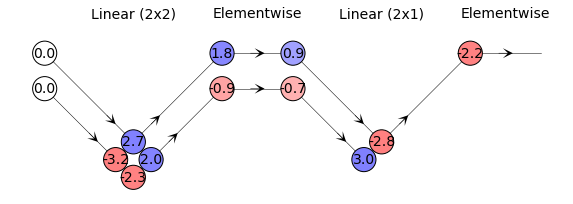

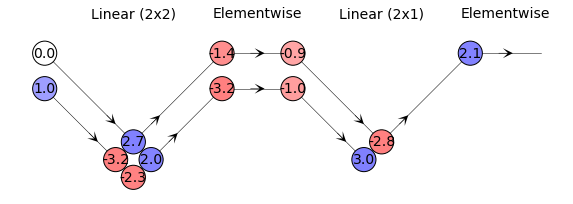

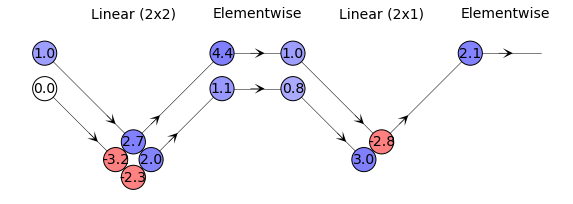

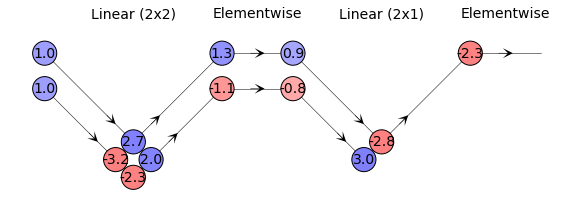

In [38]:
for n in range(4):
  fig,ax = plt.subplots();
  drawLinearLayer      (ax, xnd[n], u1[n], w01, 0,5)
  drawElementwiseLayer (ax, 5,7,   D1)
  drawLinearLayer      (ax, x1[n], u2[n], w12, 7,12)
  drawElementwiseLayer (ax, 12,14, 1)
  ax.set_xlim(); ax.set_ylim();
  ax.set_aspect('equal'); ax.axis ('off'); fig.set_size_inches (24,3)

Note: pictures above do NOT show biases

---
## Pilot versions

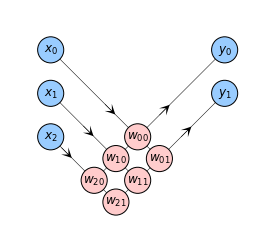

In [161]:
I = 3
J = 2
l = 4
r = .3
def node (ax, xy, radius, label, color):
  ax.add_patch( Circle(xy, radius, edgecolor='k', linestyle='-', linewidth=1, facecolor=color))
  ax.text(*xy, label, ha='center', va='center')
def line (ax, xy0, xy1, **kwargs):
  ax.plot ([xy0[0],xy1[0]], [xy0[1],xy1[1]], **kwargs)
def arrow (ax, xy0, xy1, **kwargs):
  ax.quiver (*xy0, xy1[0]-xy0[0], xy1[1]-xy0[1], angles='xy', **kwargs) #, scale_units='xy', scale=1)
def posij (i,j):
  return (l-i+j)/2,(-l-i-j)/2
fig,ax = plt.subplots(); ax.set_aspect('equal'); ax.axis ('off')
for i in range(I):
  node (ax, (0,-i), radius=r, label='$x_{}$'.format(i), color='#9CF')
  line (ax, (0,-i), posij(i,J-1), color='k', linewidth=.5, zorder=-999)
  arrow (ax, posij(i,-1.5), posij(i,-1.0), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
for j in range(J):
  node (ax, (l,-j), radius=r, label='$y_{}$'.format(j), color='#9CF')
  line (ax, (l,-j), posij(I-1,j), color='k', linewidth=.5, zorder=-999)
  arrow (ax, posij(-1.0,j), posij(-1.5,j), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
for i in range(I):
  for j in range(J):
    node (ax, posij(i,j), radius=r, label='$w_{}{}{}{}$'.format('{',i,j,'}'), color='#FCC')
ax.set_xlim(-1,l+1); ax.set_ylim(-l/2-2,1);

Above is a brief attempt to draw a linear layer in a visually appealing way.  The inputs (x) are multiplied by weights (w) to get outputs (y).

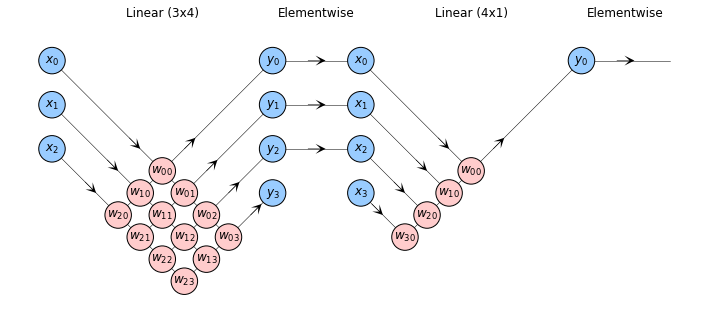

In [162]:
def node (ax, xy, radius, label, color):
  ax.add_patch(Circle(xy, radius, edgecolor='k', linestyle='-', linewidth=1, facecolor=color))
  ax.text(*xy, label, ha='center', va='center')
def line (ax, xy0, xy1, **kwargs):
  ax.plot ([xy0[0],xy1[0]], [xy0[1],xy1[1]], **kwargs)
def arrow (ax, xy0, xy1, **kwargs):
  ax.quiver (*xy0, xy1[0]-xy0[0], xy1[1]-xy0[1], angles='xy',scale_units='xy',scale=1, **kwargs)
def drawElementwiseLayer (ax, xStart=0, xEnd=4, numInputs=3):
  I = numInputs
  l = xEnd - xStart
  r = .3
  for i in range(I):
    line (ax, (xStart,-i), (xEnd,-i), color='k', linewidth=.5, zorder=-999)
    arrow (ax, ((xStart+xEnd)/2-.2,-i), ((xStart+xEnd)/2+.2,-i),units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  ax.text ((xStart+xEnd)/2, 1, 'Elementwise', ha='center')
  
def drawLinearLayer (ax, xStart=0, xEnd=4, numInputs=3, numOutputs=2):
  I = numInputs
  J = numOutputs
  l = xEnd - xStart
  r = .3
  def posij (i,j):
    return xStart+(l-i+j)/2,(-l-i-j)/2
  for i in range(I):
    node (ax, (xStart,-i), radius=r, label='$x_{}$'.format(i), color='#9CF')
    line (ax, (xStart,-i), posij(i,J-1), color='k', linewidth=.5, zorder=-999)
    arrow (ax, posij(i,-1.5), posij(i,-1.), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  for j in range(J):
    node (ax, (xEnd,-j), radius=r, label='$y_{}$'.format(j), color='#9CF')
    line (ax, (xEnd,-j), posij(I-1,j), color='k', linewidth=.5, zorder=-999)
    arrow (ax, posij(-1.0,j), posij(-1.5,j), units='dots',width=.5,headwidth=20,headlength=20,headaxislength=10)
  for i in range(I):
    for j in range(J):
      node (ax, posij(i,j), radius=r, label='$w_{}{}{}{}$'.format('{',i,j,'}'), color='#FCC')
  ax.text ((xStart+xEnd)/2, 1, 'Linear ({}x{})'.format(I,J), ha='center')

fig,ax = plt.subplots();
drawLinearLayer      (ax, 0,5,   3,4)
drawElementwiseLayer (ax, 5,7,   3)
drawLinearLayer      (ax, 7,12,  4,1)
drawElementwiseLayer (ax, 12,14, 1)
ax.set_xlim(); ax.set_ylim();
ax.set_aspect('equal'); ax.axis ('off'); fig.set_size_inches (24,5)